# Ford Go Bike - 2017
## by Quentin

This data set contains bike trip information of Ford Go Bike in 2017. The bike sharing system was rebranded as Ford go Bike on June 28th and is currently know as Bay Wheels and owned by Lyft. This data set covers bike trips data from end of June 2017, when the system was rebranded as Ford Go Bike, to the end of the year 2017.  

In [126]:
## Preliminary Wrangling

In [127]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.pyplot import figure

%matplotlib inline

import datetime

### Importing and Premilinary checks

In [128]:
#Reading file and checking first rows
df = pd.read_csv('/Users/q/Udacity/2017-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [129]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
519695,435,2017-06-28 10:00:54.5280,2017-06-28 10:08:10.4380,81,Berry St at 4th St,37.775880,-122.393170,45,5th St at Howard St,37.781752,-122.405127,400,Subscriber
519696,431,2017-06-28 09:56:39.6310,2017-06-28 10:03:51.0900,66,3rd St at Townsend St,37.778742,-122.392741,321,5th at Folsom,37.780146,-122.403071,316,Subscriber
519697,424,2017-06-28 09:47:36.3470,2017-06-28 09:54:41.1870,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,-122.392706,240,Subscriber
519698,366,2017-06-28 09:47:41.6640,2017-06-28 09:53:47.7150,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,669,Subscriber
519699,188,2017-06-28 09:49:46.3770,2017-06-28 09:52:55.3380,25,Howard St at 2nd St,37.787522,-122.397405,48,2nd St at S Park St,37.782411,-122.392706,117,Subscriber


In [130]:
#Checking lenght
df.shape

(519700, 13)

In [131]:
#Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [132]:
#Looking for Null values 
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

In [133]:
#Looking for NaN values 
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

In [134]:
#Checking if there are duplicates
df.duplicated().sum()

0

In [135]:
#Checking descriptive statistics
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


### Data Cleaning

We will adress some quality issue before moving on. 

- Convert of times to datetime format
- convert ids to string

In [136]:
#Copying file for cleaning
df_fgb_clean = df.copy()

In [137]:
#Conversion of both time columns into timestamp format 
df_fgb_clean.start_time = pd.to_datetime(df_fgb_clean.start_time)
df_fgb_clean.end_time = pd.to_datetime(df_fgb_clean.end_time)

In [138]:
#Checking past manipulation
df_fgb_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

In [139]:
#Converting all id columns to string format-object
df_fgb_clean.start_station_id = df_fgb_clean.start_station_id.astype(str)
df_fgb_clean.end_station_id = df_fgb_clean.end_station_id.astype(str)
df_fgb_clean.bike_id = df_fgb_clean.bike_id.astype(str)

In [140]:
#Chekcing past operation
df_fgb_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  object        
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  object        
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  object        
 12  user_type       

### We will now extract some information and create additional columns to support the later analysis. 

In [141]:
#First let create a columns with the duration time in minute 
#This last in currenly in seconds which is fine but minutes are easier to picture in my opinion
df_fgb_clean['duration_min'] = df_fgb_clean['duration_sec']/60

#Converting this last to integer
df_fgb_clean['duration_min'] = df_fgb_clean['duration_min'].astype(int)

In [142]:
#Checking manipulation
df_fgb_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  object        
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  object        
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  object        
 12  user_type       

In [143]:
#Let's now extract the month from the start times 
df_fgb_clean['start_time_mon'] = df_fgb_clean['start_time'].dt.strftime('%B')

see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.strftime.html
and:https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [144]:
#Checking operation
df_fgb_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  object        
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  object        
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  object        
 12  user_type       

In [145]:
df_fgb_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,start_time_mon
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1335,December
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1313,December
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,762,December
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,1036,December
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,726,December


In [146]:
#Let's now extract the weekday following the same logic
df_fgb_clean['start_time_wday'] = df_fgb_clean['start_time'].dt.strftime('%A')

see: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [147]:
#Checking operation
df_fgb_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  object        
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  object        
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  object        
 12  user_type       

In [148]:
df_fgb_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,start_time_mon,start_time_wday
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1335,December,Sunday
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1313,December,Sunday
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,762,December,Sunday
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,1036,December,Sunday
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,726,December,Sunday


In [149]:
#Finally, let's extract the hours from both start and end times
df_fgb_clean['start_time_hr'] = df_fgb_clean['start_time'].dt.hour
df_fgb_clean['end_time_hr'] = df_fgb_clean['end_time'].dt.hour

In [150]:
#Checking
df_fgb_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  object        
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  object        
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  object        
 12  user_type       

In [151]:
#Checking
df_fgb_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,start_time_mon,start_time_wday,start_time_hr,end_time_hr
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1335,December,Sunday,16,15
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1313,December,Sunday,15,13
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,762,December,Sunday,22,11
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,1036,December,Sunday,17,10
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,726,December,Sunday,14,2


#### What is the structure of your dataset?

This data set contains data about 519700 trips with 13 different features covering duration, station information and member location.


#### What is/are the main feature(s) of interest in your dataset?
The main features of interest for your analysis regards the duration of trips and the user type.


#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Start time and the information we extracted from it will be very likely usefull to have a better understanding of the patterns we will encounter while exploring both trips duration and user types.


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Duration time in second
> Majority of trips are included in a range between 250 to 1000 seconds

In [152]:
#Let's first look at our duration time data in second
df_fgb_clean.duration_sec.describe()

count    519700.000000
mean       1099.009521
std        3444.146451
min          61.000000
25%         382.000000
50%         596.000000
75%         938.000000
max       86369.000000
Name: duration_sec, dtype: float64

Text(0, 0.5, 'Bike Trips')

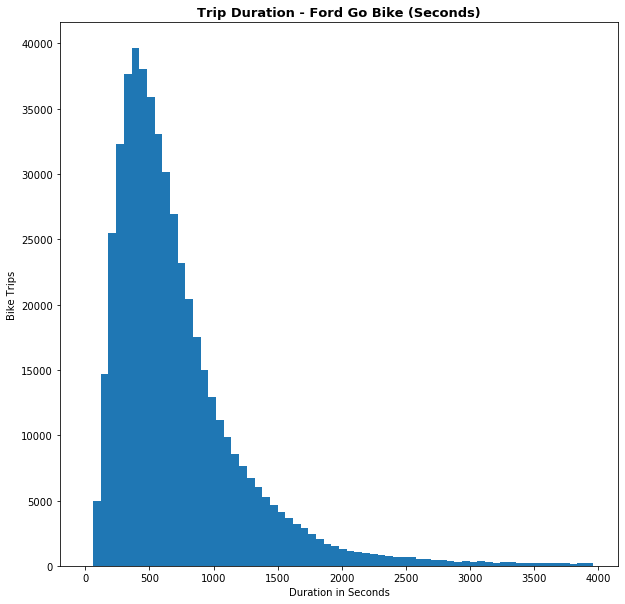

In [153]:
#Visualization
plt.figure(figsize = [10, 10])
bine = np.arange(0, 4000, 60)
plt.hist(data = df_fgb_clean, x='duration_sec', bins = bine)
plt.title("Trip Duration - Ford Go Bike (Seconds)",fontweight=('bold'), fontsize=13)
plt.xlabel('Duration in Seconds')
plt.ylabel('Bike Trips')

> The majority of the trips can be included in a range of 250 to 1000 seconds. Let now look at the data in minutes to have a more understandable interpretation. Some trips seems to have long duration but this might be due to the different kind of utilization. 

### Duration time in minutes
> 75% of users fall into 15 minutes duration trip

In [154]:
#Let's now look at the duration time in minutes
#Checking the duration data in minutes 
df_fgb_clean.duration_min.describe()

count    519700.000000
mean         17.825757
std          57.403474
min           1.000000
25%           6.000000
50%           9.000000
75%          15.000000
max        1439.000000
Name: duration_min, dtype: float64

Text(0, 0.5, 'Bike Trips')

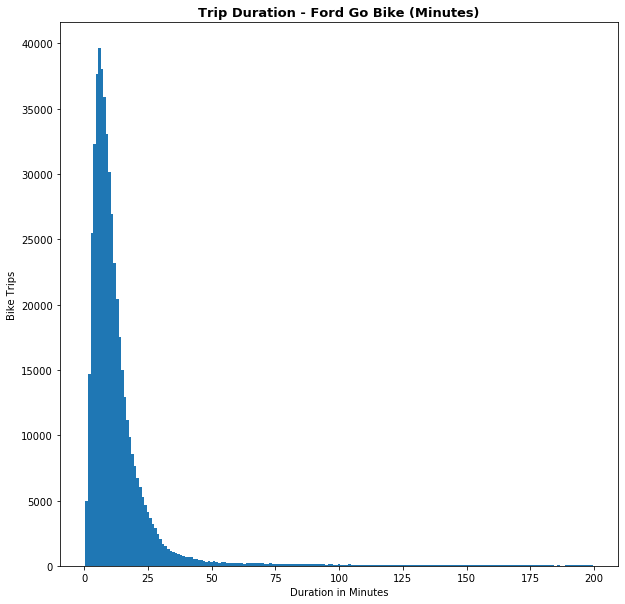

In [155]:
#Visualization
plt.figure(figsize = [10, 10])
bine = np.arange(0.5, 200, 1)
ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]

plt.hist(data = df_fgb_clean, x='duration_min', bins = bine)
plt.title("Trip Duration - Ford Go Bike (Minutes)", fontweight=('bold'), fontsize=13)
plt.xlabel('Duration in Minutes')
plt.ylabel('Bike Trips')


> The majority of the trips can be included in a range of 0 to 20 minutes. Some trips are more than two hours long. This long trip might reflect the different kind of usage depending on the user type. We will investigate in further analysis. But first let's look at the mean of the minutes duration. 

In [156]:
df_fgb_clean.duration_min.mean()

17.82575716759669

> The mean duration for trips in minutes in of 17.8. We will now look at percentages for repartition

In [157]:
df_fgb_clean.duration_min.describe()

count    519700.000000
mean         17.825757
std          57.403474
min           1.000000
25%           6.000000
50%           9.000000
75%          15.000000
max        1439.000000
Name: duration_min, dtype: float64

> The maximum duration of a trip is of 1439 minutes while 75% of the trips fall into 15minutes. We will visualize the Trip duration in minutes excluding trips of more than an hour long

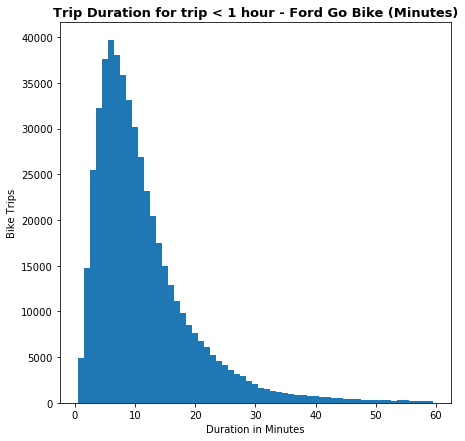

In [161]:
#Visualization
plt.figure(figsize = [7, 7]);
bine = np.arange(0.5, 60, 1);
ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55];

plt.hist(data = df_fgb_clean, x='duration_min', bins = bine);
plt.title("Trip Duration for trip < 1 hour - Ford Go Bike (Minutes)", fontweight=('bold'), fontsize=13);
plt.xlabel('Duration in Minutes');
plt.ylabel('Bike Trips');

> As expressed before, 75% of users fall into 15 minutes trip. As we can see above, even considering trips until 60minutes, very few users actually use the bikes for more than 30 minutes.

### User types
> Most users are using the Subscription base model

In [159]:
user_t = df_fgb_clean.user_type.value_counts()
user_t

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

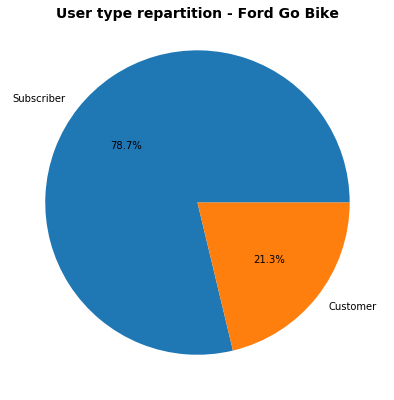

In [160]:
#Let's now look at the repartition of users types within our data set. 
plt.figure(figsize = [7, 7]);
plt.pie(user_t, labels= user_t.index, autopct= '%1.1f%%', counterclock= True);
plt.title('User type repartition - Ford Go Bike', fontweight=('bold'), fontsize=14, y=0.97);

> As we can see from our visualisation, more than 78% of users are Subscriber while approximately 21% are Customer. We will investigate their respective utilization later on. But we will first look at the usage depending on the time. 

### Usage by Months
> October was the month with the most trip in the first year of operation as Ford Go Bike

In [98]:
#We will duplicate the data set for this manipulation
df_fgb_vis = df_fgb_clean.copy()

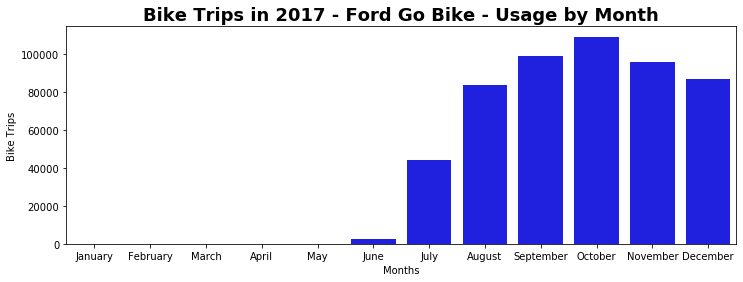

In [162]:
#Let's investigate the distribution of trips on the different months of the year
plt.figure(figsize = [12, 4]);
monthsofy = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November',  'December',];

catgmon = pd.api.types.CategoricalDtype(ordered=True, categories=monthsofy);
df_fgb_vis['start_time_mon'] = df_fgb_vis['start_time_mon'].astype(catgmon);
sb.countplot(data=df_fgb_vis, x='start_time_mon', color='blue');
plt.title("Bike Trips in 2017 - Ford Go Bike - Usage by Month", fontweight=('bold'), fontsize=18);
plt.xlabel('Months');
plt.ylabel('Bike Trips');

> Month before June do nt have any registered trips as the system was relaunched the 28th of June under its Ford Go Bike name (later changed to Bay Wheels in June 2019). This event also explains the very low amount of trips registered in June. 
For the registered trips of the year 2017, we can see that October was the month with most trips but also the month from which usage started declining. 

### Usage by WeekDays
> Ford Go Bikes were mostly used on week working days in 2017

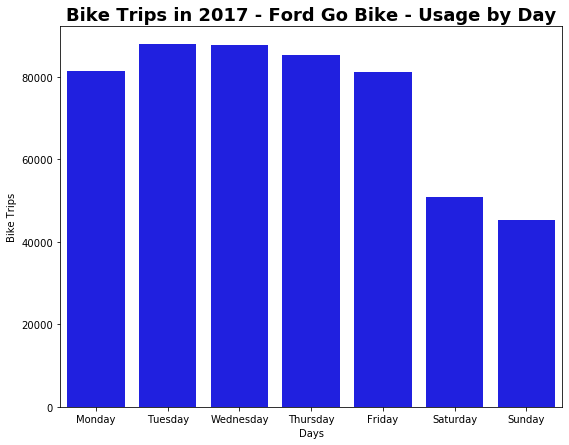

In [163]:
#Let's investigate the distribution of trips depending on the day of the week
plt.figure(figsize = [9, 7])
dayofy = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
catgday = pd.api.types.CategoricalDtype(ordered=True, categories=dayofy);
df_fgb_vis['start_time_wday'] = df_fgb_vis['start_time_wday'].astype(catgday);
sb.countplot(data=df_fgb_vis, x='start_time_wday', color='blue');
plt.title("Bike Trips in 2017 - Ford Go Bike - Usage by Day", fontweight=('bold'), fontsize=18);
plt.xlabel('Days');
plt.ylabel('Bike Trips');

> As we can see from the previous visualization, bikes are mostly use on week working days. Tuesday and Wednesday are the days with the most registered bike trips while Sunday in the one with the lowest amount of registered trip for the year 2017. 

### Usage by Hours
> The pic hours for bike trips happened at 8am and 5pm and bikes were mainly used from 7am to 7pm

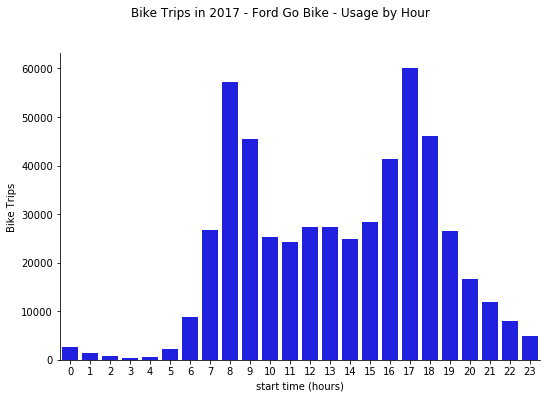

In [164]:
#Visualization of utilization of bikes depending on the starting hour
hour_u = sb.catplot(data = df_fgb_clean, x='start_time_hr', aspect= 1.5, color='blue', kind='count');
hour_u.fig.suptitle('Bike Trips in 2017 - Ford Go Bike - Usage by Hour', y=1.1);
hour_u.set_axis_labels('start time (hours)', 'Bike Trips');



> We can pbserve that bikes are mostly used between 7am and 7pm with pics at both 8am and 5pm. Howver, usage are very low from 11pm to 5am.

## Bivariate Exploration

### User types and duration (minutes)
> The average duration of trips for Subscriber were close to 10 minutes while Customers had average duration of more than 40minutes in 2017

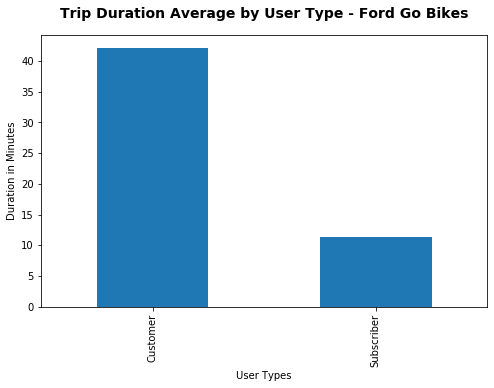

In [165]:
#We will investigate the average duration of trips in minutes between both user types
t_d = df_fgb_clean.groupby('user_type')['duration_min'].mean().plot(kind='bar', figsize=(8,5));
t_d.set_title('Trip Duration Average by User Type - Ford Go Bikes',y=1.04, fontweight=('bold'), fontsize=14);
t_d.set_ylabel('Duration in Minutes');
t_d.set_xlabel('User Types');

> We can observe a very strong difference between both average duration usage between both user groups. On one hand, customers have in average, trips of more than 40minutes while the average duration of a Subscriber's trip fall between 10 and 15minutes. This very different average trip utilization might be due to different utilization from both customer groups. Further investigation with the day of the weeks might give us more insights.

### User types and usage by days
> Subscriber were much more active on week working days

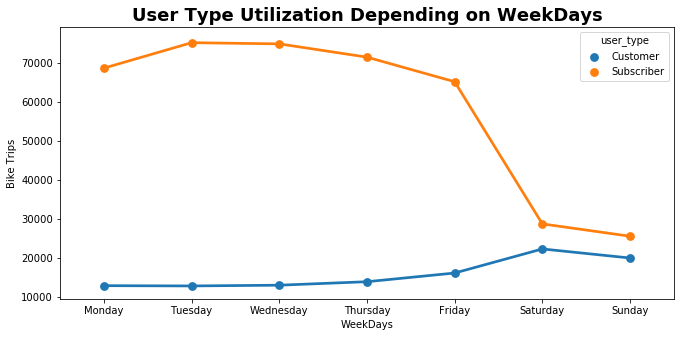

In [166]:
#We will now visualize the utilization of the different user types depending on the day of the week
plt.figure(figsize = [11, 5])

usertbyweek = df_fgb_clean.groupby(['start_time_wday', 'user_type']).size().reset_index()
wday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sb.pointplot(data=usertbyweek, x='start_time_wday', hue = 'user_type', order = wday, y=0);
plt.title("User Type Utilization Depending on WeekDays", fontweight=('bold'), fontsize=18);
plt.xlabel('WeekDays');
plt.ylabel('Bike Trips');

> We can observe very different usage for both user types depending on week days. While Subscribers are very active from Monday to Friday, we observe a significant drop of utilization during the week end. On the other end, Customers demonstrate very low activity in the beginning of the week. It grows slowly until Saturday which is the weekly pic of utilization for this customer group. It decreases on Sunday but the utilization still higher than for Friday for this last day. 



### User types and usage by months
> Customers highest month was in September, the hottest day of the year.

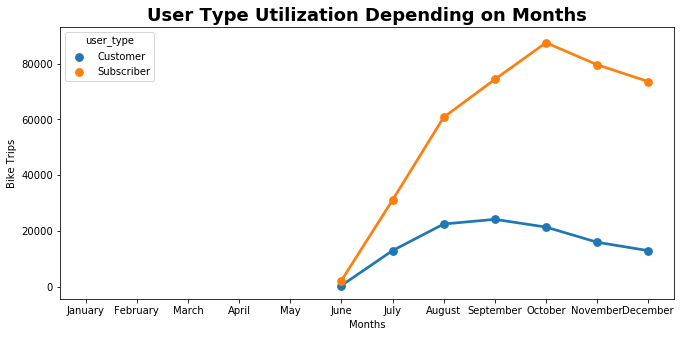

In [167]:
#Visualization of both user types depending on the month of the year
plt.figure(figsize = [11, 5])

usertbymonths = df_fgb_clean.groupby(['start_time_mon', 'user_type']).size().reset_index()
mont = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December']

ax = sb.pointplot(data=usertbymonths, x='start_time_mon', hue = 'user_type', order = mont, y=0);
plt.title("User Type Utilization Depending on Months", fontweight=('bold'), fontsize=18);
plt.xlabel('Months');
plt.ylabel('Bike Trips');

> From our Usage depending on Months we can observe that the different types of users have different behaviours depending on the months. Customers tend to be more active in August and September while the pic for subscriber is in October and the main usage period is spread from August to December.
Customers might be more active in August and September as their utilization might be for leasure and not for communiting purpose. September is the hottest month of the year in San Francisco and the city is also less crowded than during the summer. This might encourage tourists or resident to use bikes for pleasure.


#### In this section, we observed that customer had in average much longer trips than Subscribers. In fact, customers have in average trips of more than 40 minutes while Subscribers have in average trips of slightly more than 10 minutes. We also observed that Subscribers were very active from Monday to Friday but complete much less trips during the week ends. On the contrary, customers are incrementaly active though the week, with a pic of utilization on Saturday and the second most important day being Sunday. We can explain this difference in duration and day of utilization by doing an assumption of the aim of using this service. 

#### On one hand, Subscriber might use this service for commuting, which is why their utilization is concentrated from Monday to Friday and their utilization is quite of short duration. On the other hand, Customers might use bikes for the pleasure of biking accross the city. Which is why they might have longer average duration time and incremental use during the week (people might be more willing to enjoy a ride at the end of the week than at the right beginning) with a pic on week ends. The Customer group utilization pic happens in September which is the hottest month of the year and might encourage leasure users to use bikes. While Subscriber utilization is quite low during the summer and pic in October


## Multivariate Exploration


### Trip duration depending on the day of the week for both customer types
> Subscriber were much more constant than customers in regards to the trip duration within their user group and the duration of their utilization across week days.

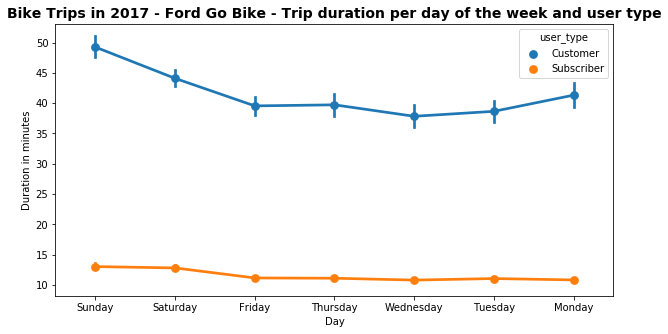

In [168]:
## We will first visualize the duration of trips depending on the day of the week for both customer types
plt.figure(figsize = [10, 5])
sb.pointplot(data=df_fgb_clean, x='start_time_wday', y='duration_min', 
             hue='user_type');
plt.title("Bike Trips in 2017 - Ford Go Bike - Trip duration per day of the week and user type", fontweight=('bold'), fontsize=14);
plt.xlabel('Day');
plt.ylabel('Duration in minutes');

> We can observe that customer have higher trip duration times on week ends than on week day which can support our previours hypothesis regarding the kind of utilization this users have in general. They also have broader differences in term of duration per user among their peers. On the other end, we can see that Subscriber have quite a constant utilization even if the duration is slightly higher on week end (but still far smaller than the customer one). Which might be due to the fact that some might use their subscription model on week ends to commute to further points than their work place.


#### This section provided insights which were in line with what we assumed but could not demonstrate before. The greater bike trip duration and difference of lenght among the customer group can indicate that their utilization if mostly for leasure. We also observe that they are mostly active on week ends which is make sense as biking for pleasure requires free time. On the other end, we can see that subscriber have quite constant trip duration among their peers and for all days of the week. Their utilization is in avergae longer on week ends and a bit more spreaded which can indicate that such users make use of their subscription model to commute to further places on week ends. They might use it for pleasure also, but for much less time than customers, which make sense if they are biking to work everyday.